In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
} #Arial是字体形式

In [3]:
import matplotlib as mpl
import kmapper as km
from ripser import ripser
from persim import plot_diagrams

In [20]:
# Some sample data
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=200, noise=0.03, factor=0.3)

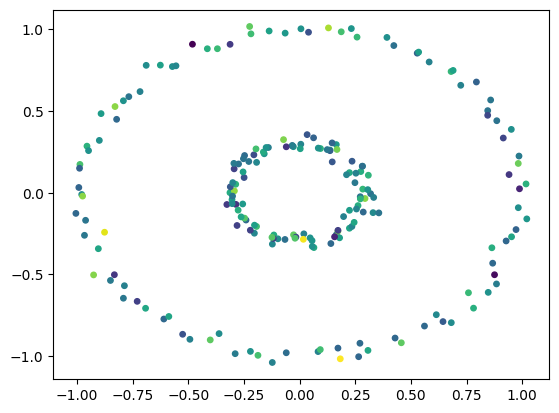

In [23]:
plt.scatter(data[:,0],data[:,1],c=np.random.randn(200),s=15)

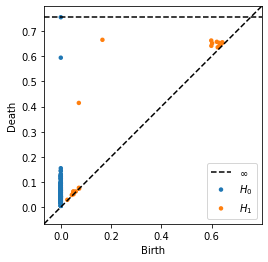

In [4]:
dgms = ripser(data)['dgms']
plot_diagrams(dgms, show=True)

In [14]:
import kmapper as km
from kmapper.plotlyviz import plotlyviz

# Initialize
mapper = km.KeplerMapper(verbose=0)

# Fit to and transform the data
lens = mapper.fit_transform(data, projection=[0])

# Create dictionary called 'simplicial_complex' with nodes, edges and meta-information
simplicial_complex = mapper.map(lens, X=data,
                                cover=km.Cover(n_cubes=20, perc_overlap=0.1))

In [15]:
plotlyviz(simplicial_complex, title="Basic plot")

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width':…

In [29]:
# define a barcodes drawing function
# copied from github.
"""
  Fuction for plotting barcode diagrams
  
  Input:
    diagrams: result of rips.fit_transform
    dimension: dimension for which the barcodes will be plotted
    colors: color of bars
    line_width: width of bars
    title: tile of graph
  
  Output:
    a matplotlib graph
  """

def plot_barcodes(diagrams,dimension=0,colors='grey',line_width=0.5,title=None):
    if (title is None):
        title="Dimension "+str(dimension)
    
    barcodes=pd.DataFrame(diagrams[dimension],columns=['start','end'])
    fig, ax = plt.subplots()
    plt.hlines(y=list(barcodes.index), xmin=list(barcodes.start), xmax=list(barcodes.end), colors=colors, lw=line_width, label=title)
    plt.legend(loc='lower right')
    plt.show()


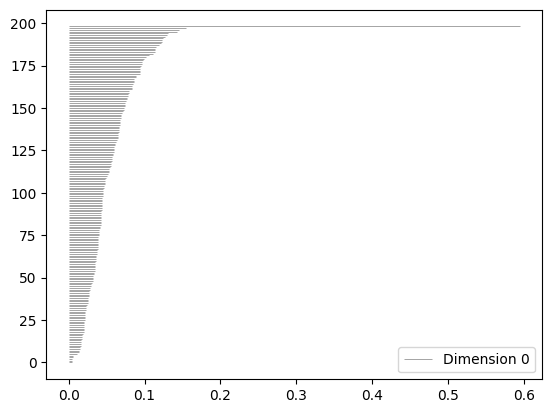

In [30]:
plot_barcodes(dgms)

In [3]:
def persist_frame(index):
    ax.clear()
    # set the axis
    ax.axis('equal')
    ax.set(xlim=(0.16e6, 0.24e6), ylim=(2.48e6, 2.53e6))    
    # the radius is growing
    threshold = 100 * index
    # draw balls
    for i in range(act_data.shape[0]):
        center = (act_data.loc[act_data.index[i], 'X'], act_data.loc[act_data.index[i], 'Y'])
        circle = plt.Circle(center, threshold, color='#a8d0b5')
        ax.add_patch(circle)

    # draw complex edge:
    # edge index array
    edge_idx = np.argwhere((distance_sparse_edge > 0).toarray() & (distance_sparse_edge <= 2 * threshold).toarray())
    # transform the indices into coordinates
    edge = np.zeros((len(edge_idx), 2), [('X', np.float64), ('Y', np.float64)])
    # note: vectorized function mapping on nparray
    search_coord = lambda idx, dim: act_data.loc[act_data.index[idx], dim]
    search_coord_vect = np.vectorize(search_coord)
    edge['X'], edge['Y'] = search_coord_vect(edge_idx, 'X'), search_coord_vect(edge_idx, 'Y')
    lines = LineCollection(edge.tolist(), color='#ffe39f', linewidth=1)
    ax.add_collection(lines)

    # draw activity points, orange color
    ax.scatter(act_data['X'], act_data['Y'], s=10, c='#fda25a')

## takens's embedding

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

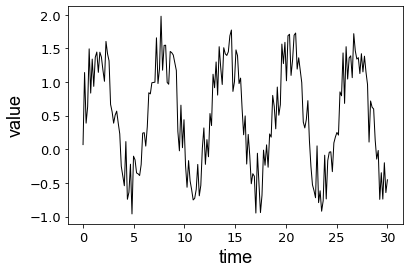

In [15]:
t = np.linspace(0,30,200)
ts = np.sin(t)+np.random.rand(len(t))  #generate a simple time series

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 18,
} #Arial是字体形式
plt.plot(t,ts,c='black',linewidth=1)
plt.xlabel('time',font1) #x轴坐标名称及字体样式
plt.ylabel('value',font1) #y轴坐标名称及字体样式
plt.xticks(fontsize=13) #x轴刻度字体大小
plt.yticks(fontsize=13) #y轴刻度字体大小
#plt.xlim(0,18)#X轴范围
#plt.ylim(-1.5,1.5)#显示y轴范围

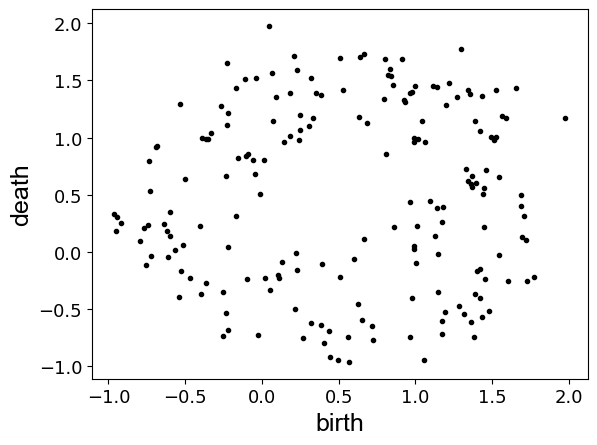

In [22]:
from teaspoon.SP.tsa_tools import takens
embedded_ts = takens(ts, n = 2, tau = 10)

plt.plot(embedded_ts.T[0], embedded_ts.T[1], 'k.')
plt.xlabel('birth',font1) #x轴坐标名称及字体样式
plt.ylabel('death',font1) #y轴坐标名称及字体样式
plt.xticks(fontsize=13) #x轴刻度字体大小
plt.yticks(fontsize=13) #y轴刻度字体大小
plt. show()

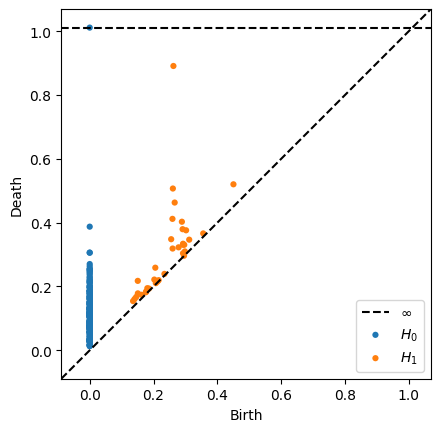

In [24]:
dgms = ripser(embedded_ts)['dgms']
#fig = plt.figure()
plot_diagrams(dgms, show=True)
#plt.xlabel('birth',font1) #x轴坐标名称及字体样式
#plt.ylabel('y',font1) #y轴坐标名称及字体样式

## 基于点云的ph

In [3]:
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram

import Ipynb_importer

In [5]:
import step3_geomery_based_clustering as gbc

In [6]:
trajectory = np.loadtxt('data/trajectory_in_week_3ptype_2019_58.txt')

In [7]:
# 数据转化：保留活动的起始点和终止点
def extract_se(trajectory):
    Point_clouds = []
    Point_clouds.append([0,trajectory[0]*333])
    Point_clouds.append([len(trajectory)-1,trajectory[-1]*333])
    
    for i in range(1,len(trajectory)):
        if trajectory[i]!=trajectory[i-1]:
            Point_clouds.append([i-1,trajectory[i-1]*333])
            Point_clouds.append([i,trajectory[i]*333])
    
    return np.array(Point_clouds)  

In [8]:
trajectory0 = trajectory[0]

In [9]:
#trajectory_sim = []
#for data in trajectory0:
data = trajectory0
trajectory_10min = gbc.simplify_seq(data)
trajectory_se = extract_se(trajectory_10min)
#trajectory_sim.append(trajectory_se)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

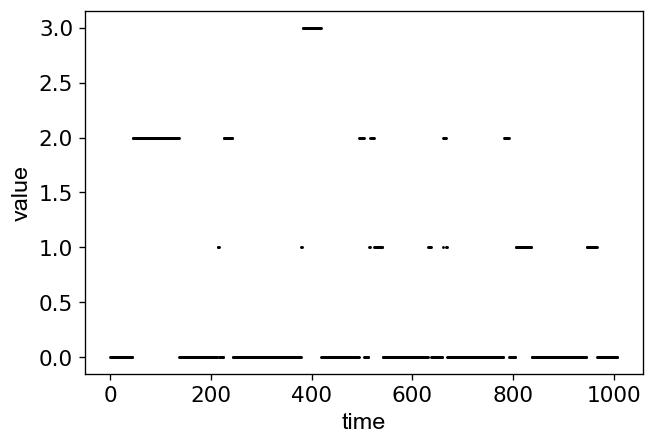

In [21]:
plt.figure(dpi=120)
plt.scatter(np.arange(len(trajectory_10min)),trajectory_10min,c='black',s=0.5)
plt.xlabel('time',font1) #x轴坐标名称及字体样式
plt.ylabel('value',font1) #y轴坐标名称及字体样式
plt.xticks(fontsize=13) #x轴刻度字体大小
plt.yticks(fontsize=13) #y轴刻度字体大小

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

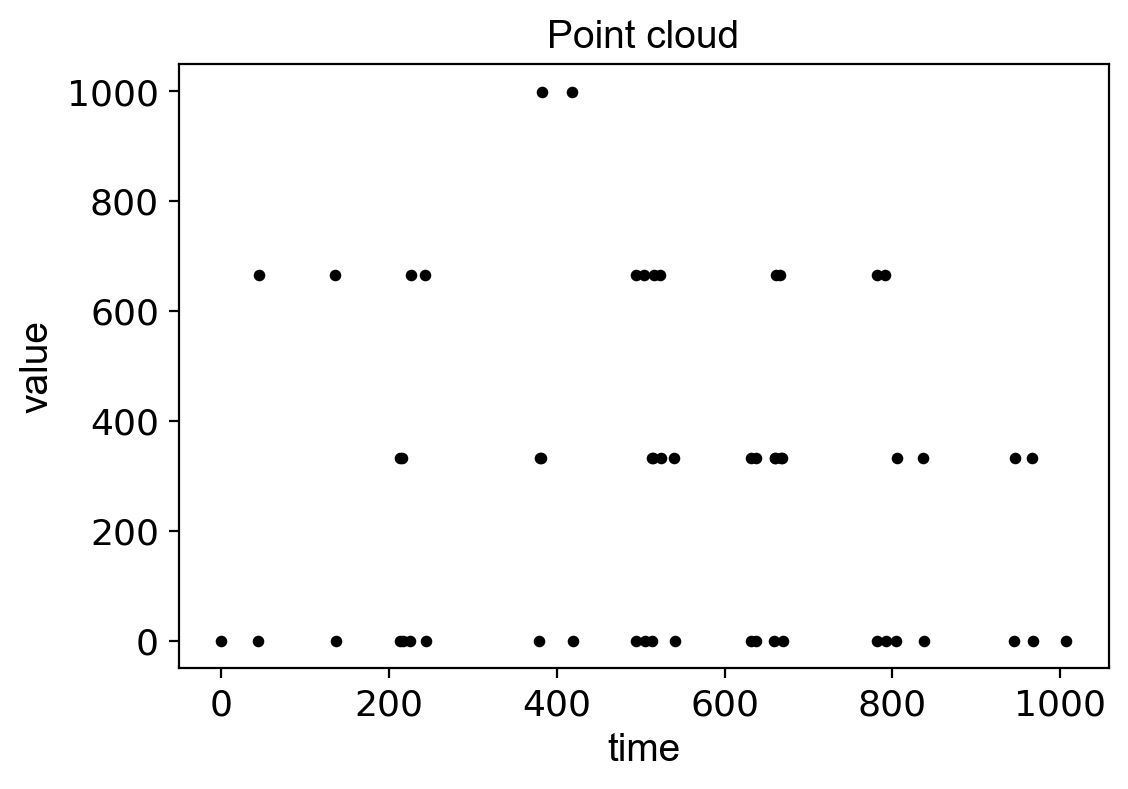

In [13]:
plt.figure(dpi=200)
plt.scatter(trajectory_se[:,0],trajectory_se[:,1],c='black',s=10)
plt.xlabel('time',font1) #x轴坐标名称及字体样式
plt.ylabel('value',font1) #y轴坐标名称及字体样式
plt.title('Point cloud',font1)
plt.xticks(fontsize=13) #x轴刻度字体大小
plt.yticks(fontsize=13) #y轴刻度字体大小

In [23]:
data = np.array([np.arange(len(trajectory_10min)),trajectory_10min])
X= data.reshape(1,*data.shape)
VR = VietorisRipsPersistence(homology_dimensions=[0, 1])  # Parameter explained in the text
diagrams = VR.fit_transform(X)

In [24]:
plot_diagram(diagrams[0])

In [25]:
data = trajectory_se
X= data.reshape(1,*data.shape)
VR = VietorisRipsPersistence(homology_dimensions=[0, 1])  # Parameter explained in the text
diagrams = VR.fit_transform(X)

In [28]:
diagrams[0]

array([[  0.        ,   1.        ,   0.        ],
       [  0.        ,   1.        ,   0.        ],
       [  0.        ,   1.        ,   0.        ],
       [  0.        ,   2.        ,   0.        ],
       [  0.        ,   4.        ,   0.        ],
       [  0.        ,   5.        ,   0.        ],
       [  0.        ,   5.        ,   0.        ],
       [  0.        ,   7.        ,   0.        ],
       [  0.        ,   7.        ,   0.        ],
       [  0.        ,   7.        ,   0.        ],
       [  0.        ,   8.        ,   0.        ],
       [  0.        ,   8.        ,   0.        ],
       [  0.        ,   9.        ,   0.        ],
       [  0.        ,   9.        ,   0.        ],
       [  0.        ,   9.        ,   0.        ],
       [  0.        ,  10.        ,   0.        ],
       [  0.        ,  11.        ,   0.        ],
       [  0.        ,  11.        ,   0.        ],
       [  0.        ,  12.        ,   0.        ],
       [  0.        ,  12.     

([<matplotlib.axis.YTick at 0x28544c78a60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

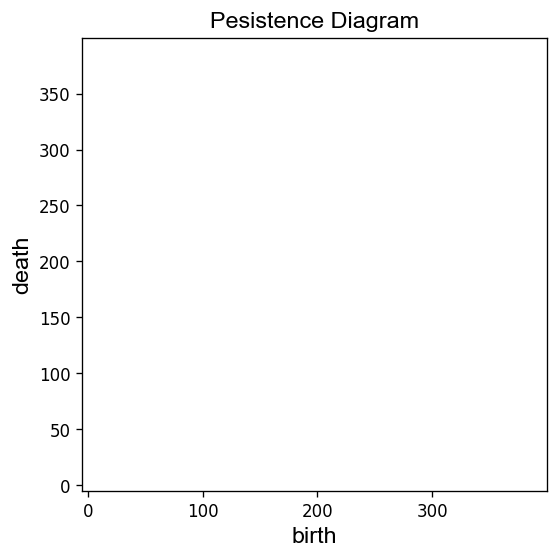

In [35]:
plt.figure(dpi=120,figsize=[5,5])
plt.title('Pesistence Diagram',font1)
plt.xlabel('birth',font1)
plt.ylabel('death',font1)
plt.xlim([-5,400])
plt.xticks(np.arange(0,400,100))
plt.ylim([-5,400])
plt.yticks(np.arange(0,400,50))

In [27]:
plt.figure(dpi=120)
plot_diagram(diagrams[0])

<Figure size 720x480 with 0 Axes>

## 基于wft的ph

In [6]:
# wft, copy from chen et.al.
def wft(x,num):
    Ipower = np.zeros(15) #时间序列长度不大于2^15
    y = np.zeros(num)
    
    
    for i in range(num):
        IB = i
        IL=0
        
        while True:
            IBD = int(IB/2)
            Ipower[IL] = 0 if IB == (IBD * 2) else 1
                
            if IB == 0 or IBD == 0:
                break
            IB = IBD
            IL = IL + 1
        
        IP = 0
        IFAC = num
        for t1 in range(IL+1):
            IFAC = int (IFAC / 2)
            IP = int (IP + IFAC * Ipower[t1])
        
        y[IP] = x[i]
        
    
    x = y.copy()
    Iter = int(np.log2(num))
    for M in range(Iter):
        nump = 1 if M==0 else int(nump*2)
        Mnum = int (num / nump)
        Mnum2 = int(Mnum / 2)
        alph = 1
        for MP in range(nump):
            IB = int(MP * Mnum)
            
            for MP2 in range(Mnum2):
                mnum21 = int(Mnum2 + MP2 + IB) 
                IBA = int(IB + MP2)
                y[IBA] = x[IBA] + alph * x[mnum21]
                y[mnum21] = x[IBA] - alph * x[mnum21]

            alph = -alph
        
        r = np.power(num,-0.5)
        for i in range(num):
            x[i] = y[i] * r
        
    return y

In [70]:
trajectory0 = np.zeros(128)
trajectory0[20:100] = np.ones(80)
dim = len(trajectory0)
#next2 = np.power(2,int(np.log2(dim)+1))
next2 = dim
WFTs = []

sequence = np.pad(trajectory0,(0,next2-dim),'constant', constant_values=(0, 0))
wft_seq = wft(sequence,next2)*1e+4

In [9]:
from teaspoon.TDA.SLSP import Persistence0D

In [71]:
data = wft_seq
feature_ind_1, feature_ind_2, persistenceDgm = Persistence0D(data) 

Text(0.5, 1.0, 'Categorical Time Series')

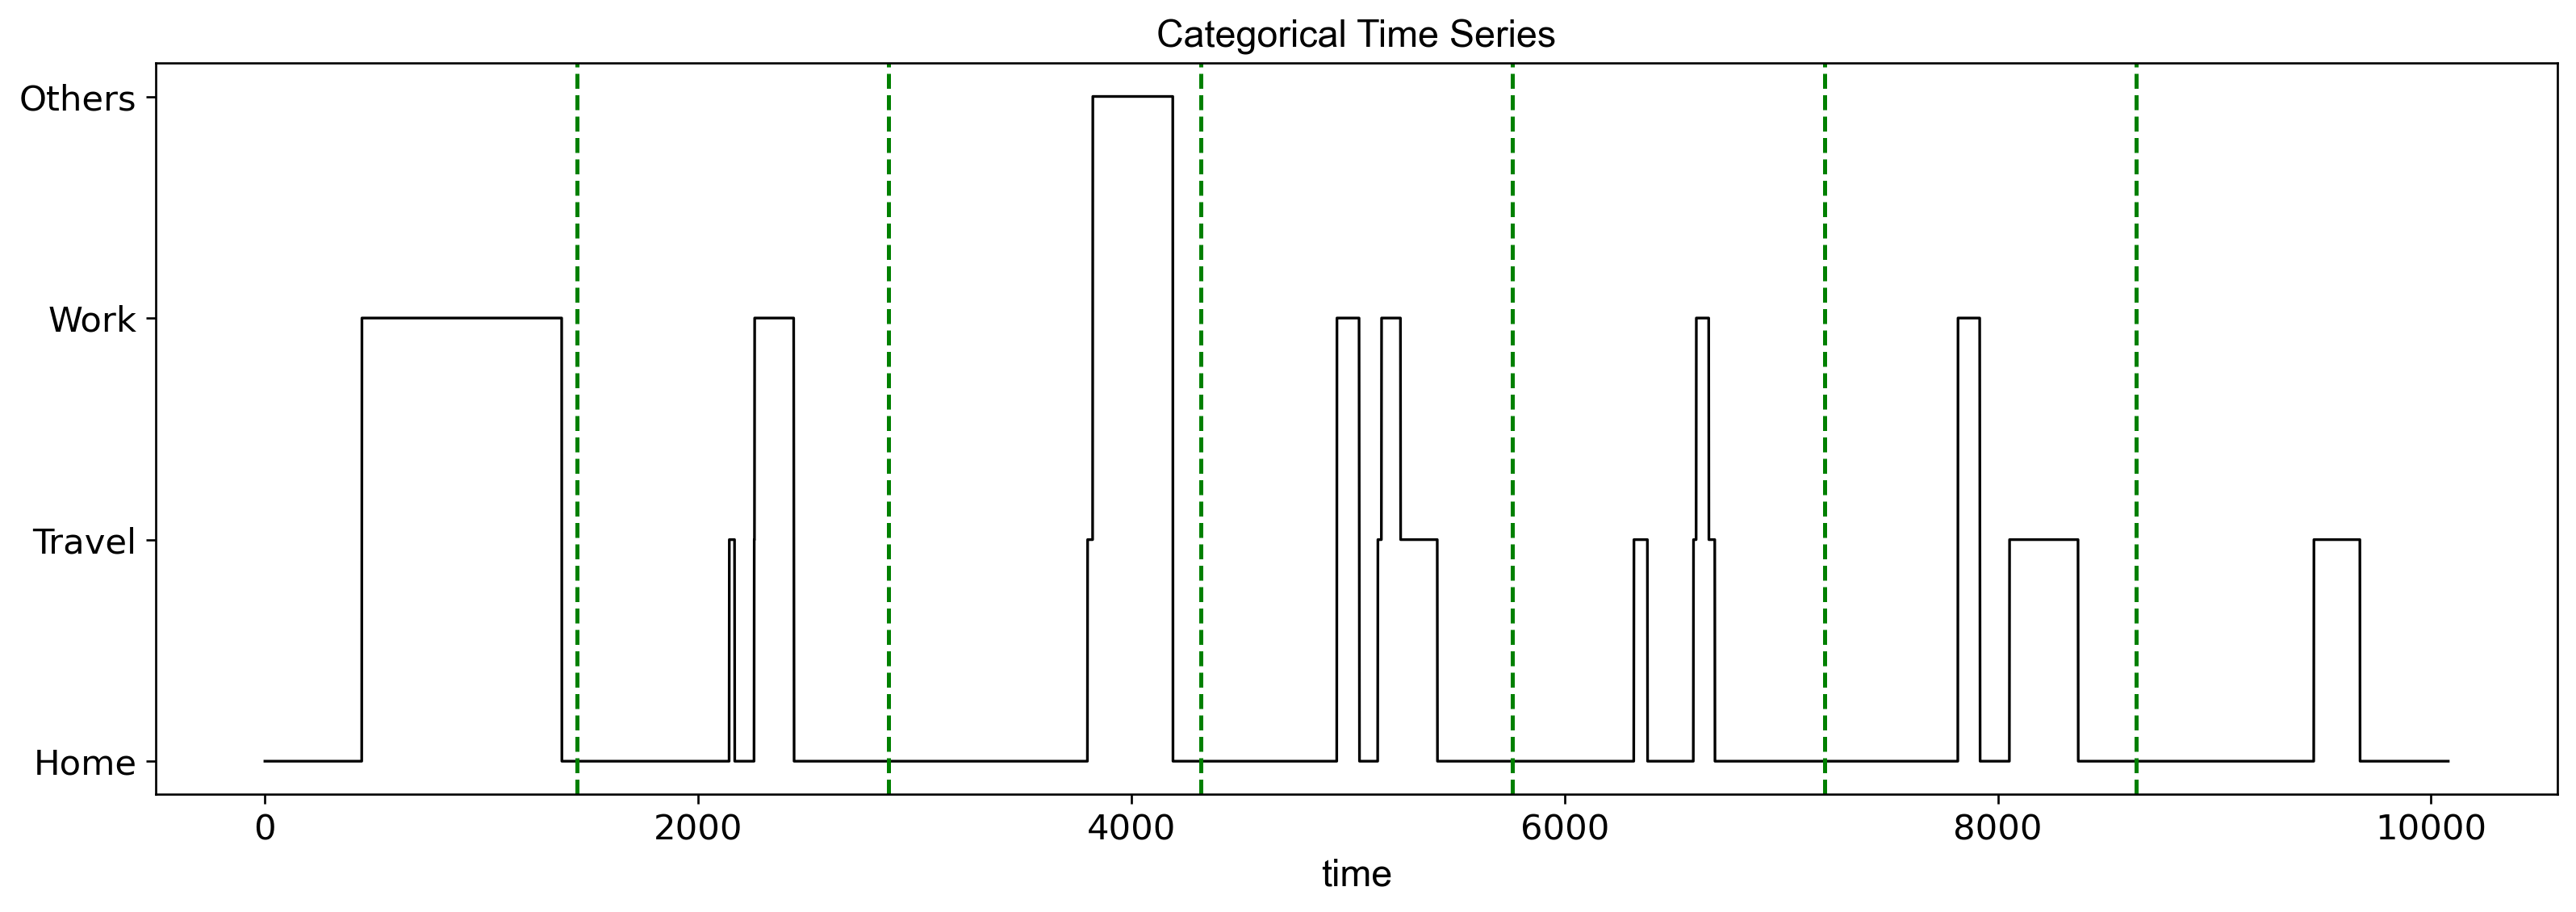

In [12]:
fig, ax = plt.subplots(figsize=(16,5),dpi=240)
plt.plot(trajectory[0],c='black',linewidth=1)
for day in range(1,7):
    ax.axvline(1440*day, ls="--", c='green')
    #plt.plot([1440*day,1440*day],[-0.5,3.5],'b--',linewidth = 0.5)
plt.xlabel('time',font1) #x轴坐标名称及字体样式
#plt.ylabel('value',font1) #y轴坐标名称及字体样式
plt.yticks(np.arange(0,4,1),['Home','Travel','Work','Others'],fontsize=13) #x轴刻度字体大小
plt.xticks(fontsize=13) #y轴刻度字体大小
plt.title('Categorical Time Series',font1)

Text(0.5, 1.0, 'Walsh-Fourier Transform')

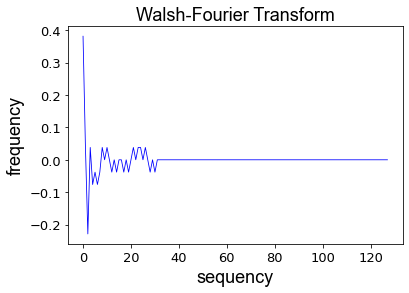

In [68]:
plt.plot(wft_seq,c='blue',linewidth=0.8)
plt.xlabel('sequency',font1) #x轴坐标名称及字体样式
plt.ylabel('frequency',font1) #y轴坐标名称及字体样式
plt.xticks(fontsize=13) #x轴刻度字体大小
plt.yticks(fontsize=13) #y轴刻度字体大小
plt.title('Walsh-Fourier Transform',font1)

Text(0.5, 1.0, 'Persistence Diagram')

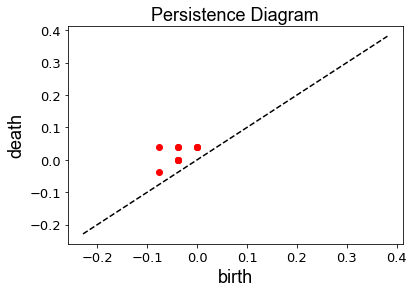

In [72]:
dt = persistenceDgm
plt.plot(dt[:,0],dt[:,1],'ro')
plt.plot([min(wft_seq), max(wft_seq)], [min(wft_seq), max(wft_seq)],'k--')

plt.xlabel('birth',font1) #x轴坐标名称及字体样式
plt.ylabel('death',font1) #y轴坐标名称及字体样式
plt.xticks(fontsize=13) #x轴刻度字体大小
plt.yticks(fontsize=13) #y轴刻度字体大小
plt.title('Persistence Diagram',font1)
#plt.plot([-2,2], [-2,2],'k--')

## 编辑距离计算

In [1]:
import numpy as np
from Levenshtein import distance as lev

In [11]:
s1='hhtwwwwwwwwthhhh'
s2='htwwwthtwwttwwth'
s3='hhtssssssssthhhh'

In [12]:
lev(s1,s2)

8

In [10]:
lev(s2,s3)

13

## 深圳地图

In [4]:
#读入活动点数据
filename = 'data/stay_one_community_2019.csv'
act_points2019 = pd.read_csv(filename,parse_dates=['t_start', 't_end'])
act_points2019['date'] = pd.to_datetime(act_points2019['date'],format='%Y-%m-%d')
act_points2019.head()

pid       date             t_start               t_end  poi_id  \
0  90221 2019-05-06 2019-05-06 07:28:00 2019-05-06 22:51:56       1   
1  90221 2019-05-07 2019-05-07 00:52:01 2019-05-07 11:44:26       0   
2  90221 2019-05-07 2019-05-07 12:09:41 2019-05-07 13:39:58       0   
3  90221 2019-05-07 2019-05-07 13:41:28 2019-05-07 16:42:16       1   
4  90221 2019-05-07 2019-05-07 16:43:47 2019-05-07 23:14:57       0   

   community_id  ptype   longitude   latitude  week  weekday  
0          2291      2  114.185092  22.651382    19        0  
1          2291      1  114.174066  22.640383    19        1  
2          2291      1  114.174066  22.640383    19        1  
3          2291      2  114.185092  22.651382    19        1  
4          2291      1  114.174066  22.640383    19        1

In [5]:
# 生成月份标签
act_points2019['month'] = [data.month for data in act_points2019['date']]

# 月份选取
act_points2019_58 = act_points2019.query('month in [5,6,7,8]')

In [6]:
pid = np.unique(act_points2019_58['pid'])
pid_data = {'pid':pid}
PID = pd.DataFrame(pid_data)
PID.to_csv('data/pid_unique_2019_58.csv',index=False)

In [7]:
print(len(pid),len(act_points2019_58))

192 23644


In [8]:
# shp转geojson
import geopandas as gpd

#shps = gpd.read_file('data/shenzhen_polygon/Shenzhen_polygon.shp')
file_name ="data/shenzhen_polygon/Shenzhen_polygon.shp"
data = gpd.read_file(file_name)
data.to_file("data/Shenzhen.json", driver='GeoJSON', encoding="utf-8")

In [9]:
import folium

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [10]:
import json
fname = "data/Shenzhen.json" 
with open(fname, encoding='utf-8') as data_file:    
    sz_data = json.load(data_file)

In [11]:
# url = 'data/shenzhen.geojson'
# sz_geo = f'{url}'
#sz_geo = 'data/shenzhen.geojson'
sz_map = folium.Map(location=[22.61667,114.06667],zoom_start=10.4)
folium.GeoJson(
    sz_data,
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(sz_map)

In [14]:
sz_map

In [41]:
# get the first 200 crimes in the cdata
limit = 4000
data = act_points2019_58.loc[act_points2019_58['pid']==pid[5]]
#data = act_points2019_58.iloc[0:limit, :]

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
for lat, lng in zip(data.latitude, data.longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )

# Add incidents to map
sz_map.add_child(incidents)

In [18]:
from folium.plugins import HeatMap

# Convert data format
heatdata = data[['latitude','longitude']].values.tolist()

# add incidents to map
HeatMap(heatdata).add_to(sz_map)

In [30]:
com_lat = 22.642127
com_lon = 114.18582
folium.Marker([com_lat,com_lon]).add_to(sz_map)

In [31]:
sz_map

## 居民个人属性描述性统计

In [3]:
pid_attri = pd.read_csv('data/pid_attri.csv')
pid_attri.head()

pid  gender  age    arpu brand
0   9620253       2    8  108.00    华为
1   9620253       2    8  113.92    华为
2   9620253       2    8  148.00    华为
3   9620253       2    8  110.88    华为
4  16350246       1   10   28.00    华为

In [4]:
arpu_avg = pid_attri.groupby('pid')['arpu'].agg('mean').reset_index()

In [5]:
pid_attri_uni = pid_attri[['pid','gender','age','brand']].drop_duplicates()

In [6]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

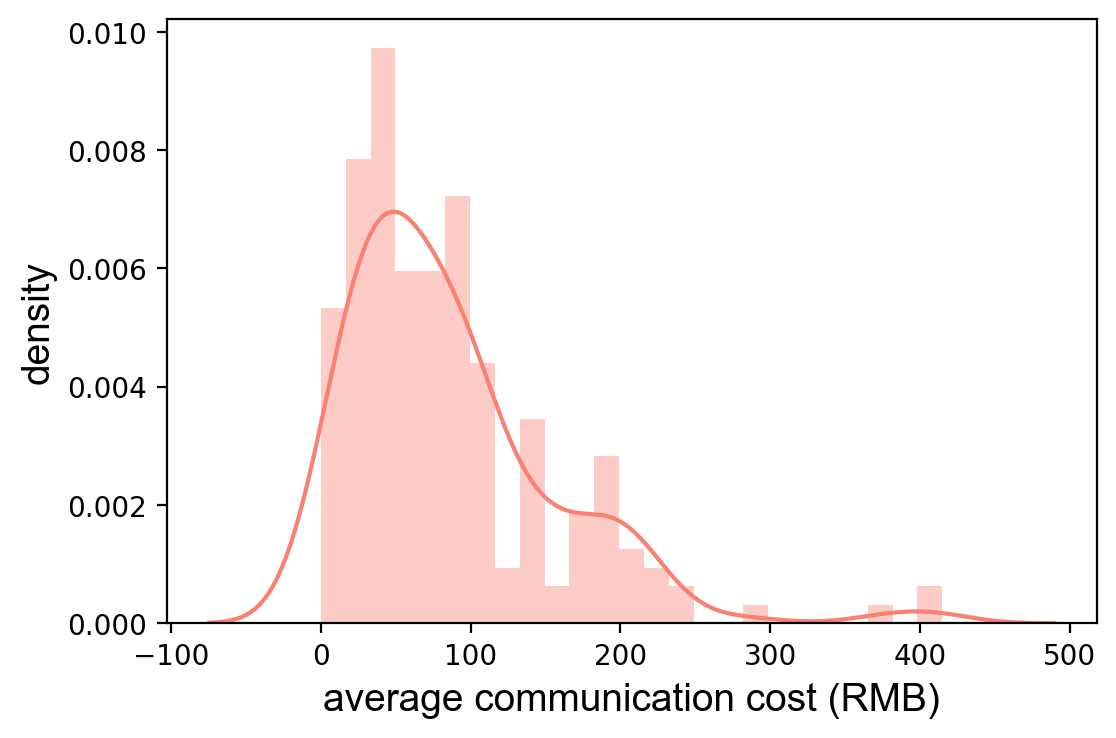

In [8]:
# 通讯话费
plt.figure (dpi=200)
#sns.set(style='dark')
#sns.set_style("dark", {"axes.facecolor": "seashell"})#修改背景色
g=sns.distplot(arpu_avg['arpu'],
               color="salmon",
               bins = 25)#修改柱子颜色
plt.xlabel('average communication cost (RMB)',font1)
plt.ylabel('density',font1)

In [117]:
max(arpu_avg['arpu'])

415.025

In [9]:
# 手机品牌
brandlist = ['华为','苹果','三星','小米','维沃','欧珀','魅族','荣耀']
Brand = []
for index,data in enumerate(pid_attri_uni['brand']):
    if data in brandlist:
        Brand.append(data)
    else:
        Brand.append('other')

In [10]:
phone_brand = {'brand':Brand}
phone_brand = pd.DataFrame(phone_brand)
dict_ = {'华为':'Huawei','苹果':'iPhone','三星':'Samsung','小米':'Xiaomi','维沃':'Vivo','欧珀':'Oppo','魅族':'Meizu','荣耀':'Honor'}
phone_brand['brand'] = phone_brand['brand'].map(dict_)
phone_brand['brand'].fillna(value='other',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

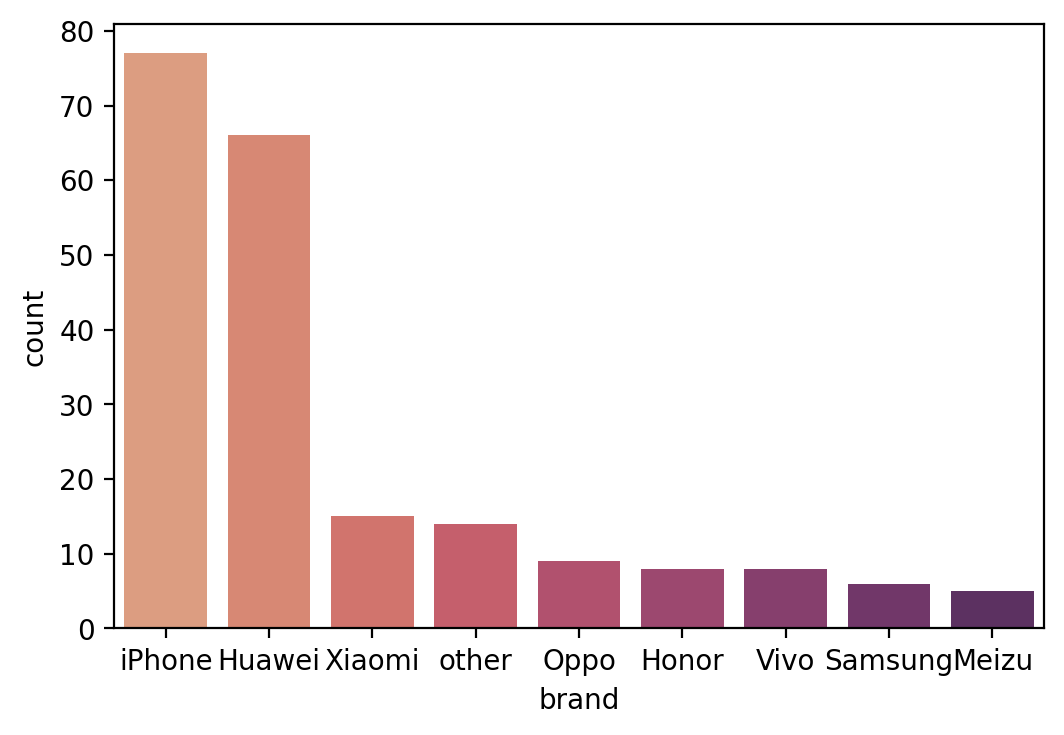

In [12]:
tem = phone_brand['brand'].value_counts()
plt.figure (dpi=200)
sns.countplot(phone_brand['brand'],order=tem.index,palette="flare")
plt.xticks(fontsize=10) #x轴刻度字体大小
plt.yticks(fontsize=10) #y轴刻度字体大小

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


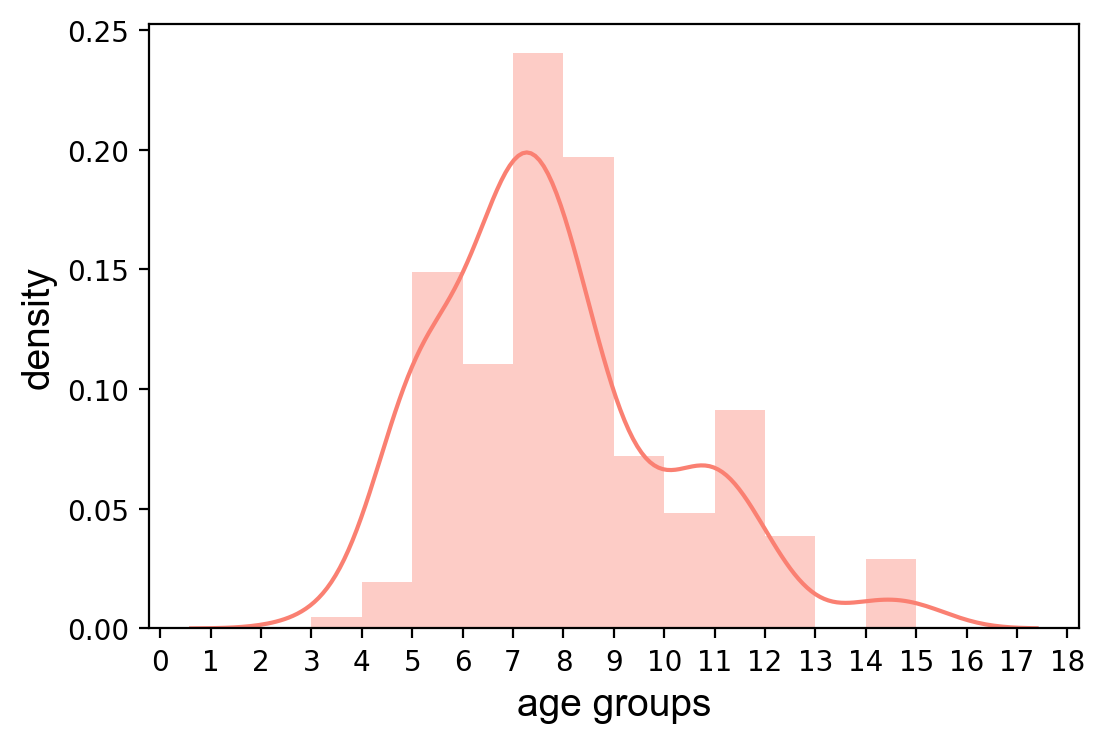

In [13]:
# 年龄组
plt.figure (dpi=200)
g=sns.distplot(pid_attri_uni['age'],
               color="salmon")#修改柱子颜色
plt.xlabel('age groups',font1)
plt.ylabel('density',font1)


from matplotlib.pyplot import MultipleLocator
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

In [15]:
dict_ = {1:'male',2:'female'}
pid_attri_uni['gender'] = pid_attri_uni['gender'].map(dict_)
sorted_counts = pid_attri_uni['gender'].value_counts()

(-1.1111319315996104,
 1.118965658185054,
 -1.115744617422201,
 1.1143529723624634)

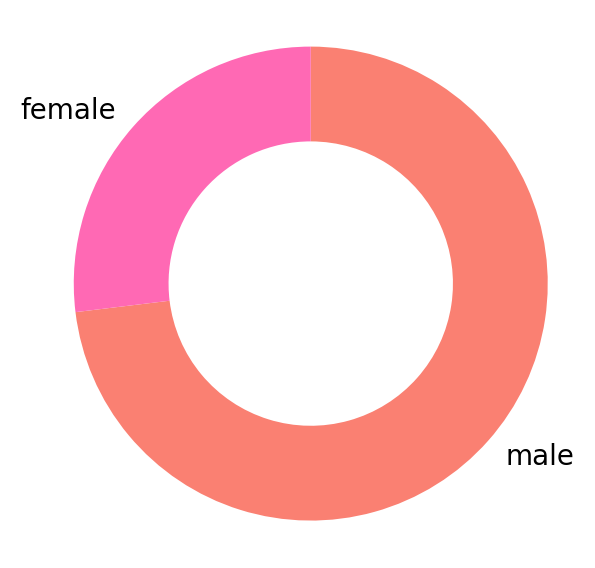

In [17]:
fig = plt.figure (dpi=200,figsize=(5,3.5))
#fig.patch.set_facecolor('seashell')
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},colors=('salmon','hotpink'));
plt.axis('square')


#plt.legend(loc='best')

(-1.10550848720663,
 1.1049492768887754,
 -1.1046964618426762,
 1.1057613022527293)

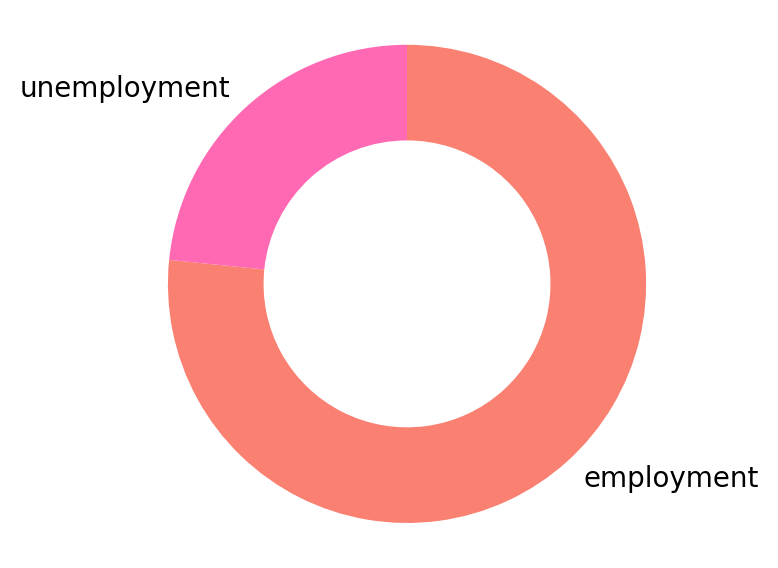

In [3]:
fig = plt.figure (dpi=200,figsize=(5,3.5))
#fig.patch.set_facecolor('seashell')
plt.pie([0.766,1-0.766], labels = ['employment','unemployment'], startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},colors=('salmon','hotpink'));
plt.axis('square')

## 活动时间分布

In [70]:
# 不同类型天内分布
act_points2019_58.head()

pid       date             t_start               t_end  poi_id  \
0  90221 2019-05-06 2019-05-06 07:28:00 2019-05-06 22:51:56       1   
1  90221 2019-05-07 2019-05-07 00:52:01 2019-05-07 11:44:26       0   
2  90221 2019-05-07 2019-05-07 12:09:41 2019-05-07 13:39:58       0   
3  90221 2019-05-07 2019-05-07 13:41:28 2019-05-07 16:42:16       1   
4  90221 2019-05-07 2019-05-07 16:43:47 2019-05-07 23:14:57       0   

   community_id  ptype   longitude   latitude  week  weekday  month  
0          2291      2  114.185092  22.651382    19        0      5  
1          2291      1  114.174066  22.640383    19        1      5  
2          2291      1  114.174066  22.640383    19        1      5  
3          2291      2  114.185092  22.651382    19        1      5  
4          2291      1  114.174066  22.640383    19        1      5

In [21]:
#为了wft，令0-到访，1-居家，2-工作
from datetime import datetime
act = act_points2019_58
act_count = np.zeros((3,1440))
#     if (len(act)==1) & (act['ptype'][0]==1):
#         return sequence;
#     else:
for index in range(len(act)):
#for data in act:
    data = act.iloc[index,:]

    #一个问题：要考虑隔日的活动，如从23:00到次日1:00
    #解决方法：将t_start，t_end与date比较，并进行截断，t_start->0:00，t_end->23:59
    if data['t_start'].day != data['date'].day:
        data['t_start'] = datetime(data['date'].year,data['date'].month,data['date'].day,0,0,0)
    elif data['t_end'].day != data['date'].day:
        data['t_end'] = datetime(data['date'].year,data['date'].month,data['date'].day,23,59,59)

    #根据时间段修改初始活动类型
    act_begin = data['t_start'].hour*60+data['t_start'].minute
    act_end = data['t_end'].hour*60+data['t_end'].minute
    act_count[data['ptype'],act_begin:act_end] += 1 

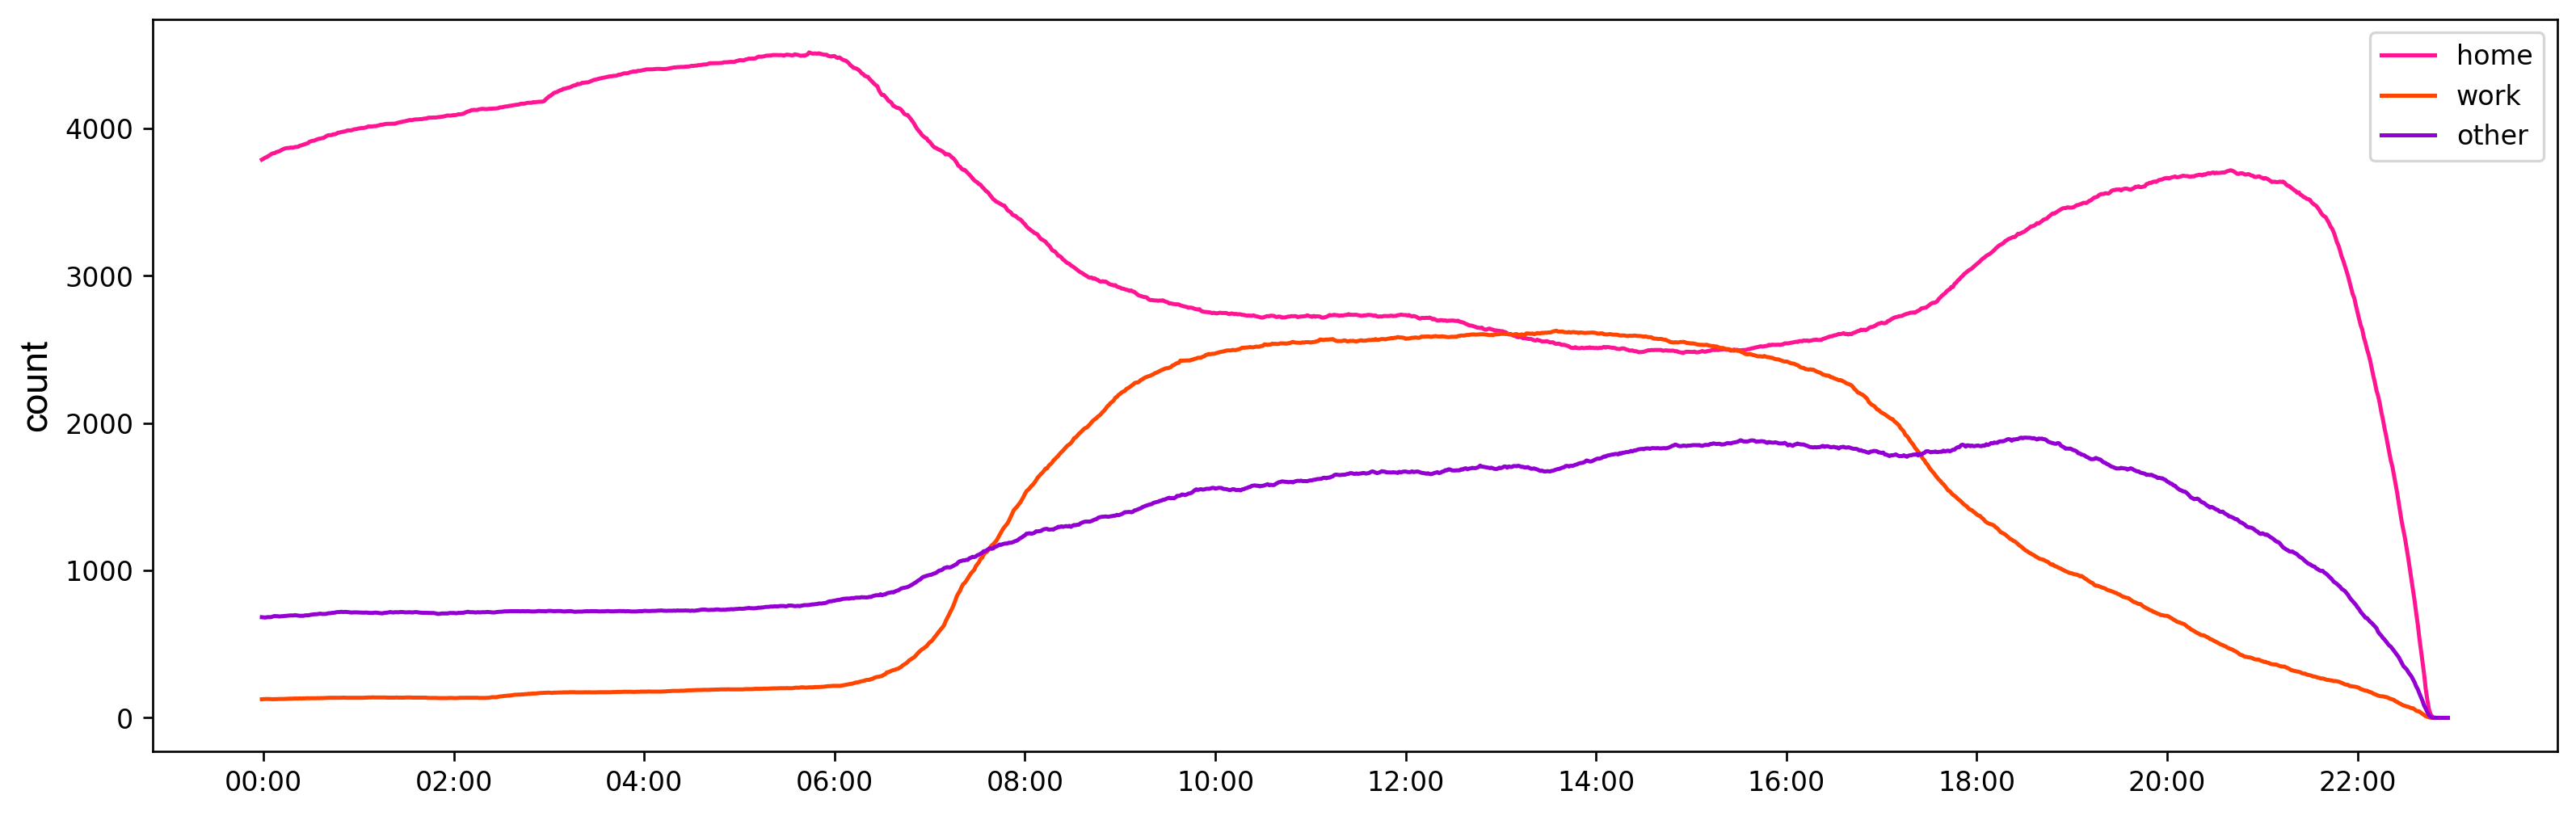

In [23]:
fig = plt.figure (figsize=[16,5],dpi=240)
#fig.patch.set_facecolor('seashell')
plt.plot(act_count[1][60:-1],label='home',c='deeppink')
plt.plot(act_count[2][60:-1],label='work',c='orangered')
plt.plot(act_count[0][60:-1],label='other',c='darkviolet')
#plt.xlabel('time',font1)
plt.ylabel('count',font1)
plt.xticks(np.arange(1, 1440, 120), ['00:00', '02:00', '04:00', '06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00'])
plt.legend(loc='best')

In [24]:
act_count_week = act_points2019_58.groupby(['ptype','weekday'])['pid'].agg('count').reset_index()

In [25]:
act_count_week[0:7]['pid']

0    1089
1    1146
2    1196
3    1244
4    1296
5    1330
6    1098
Name: pid, dtype: int64

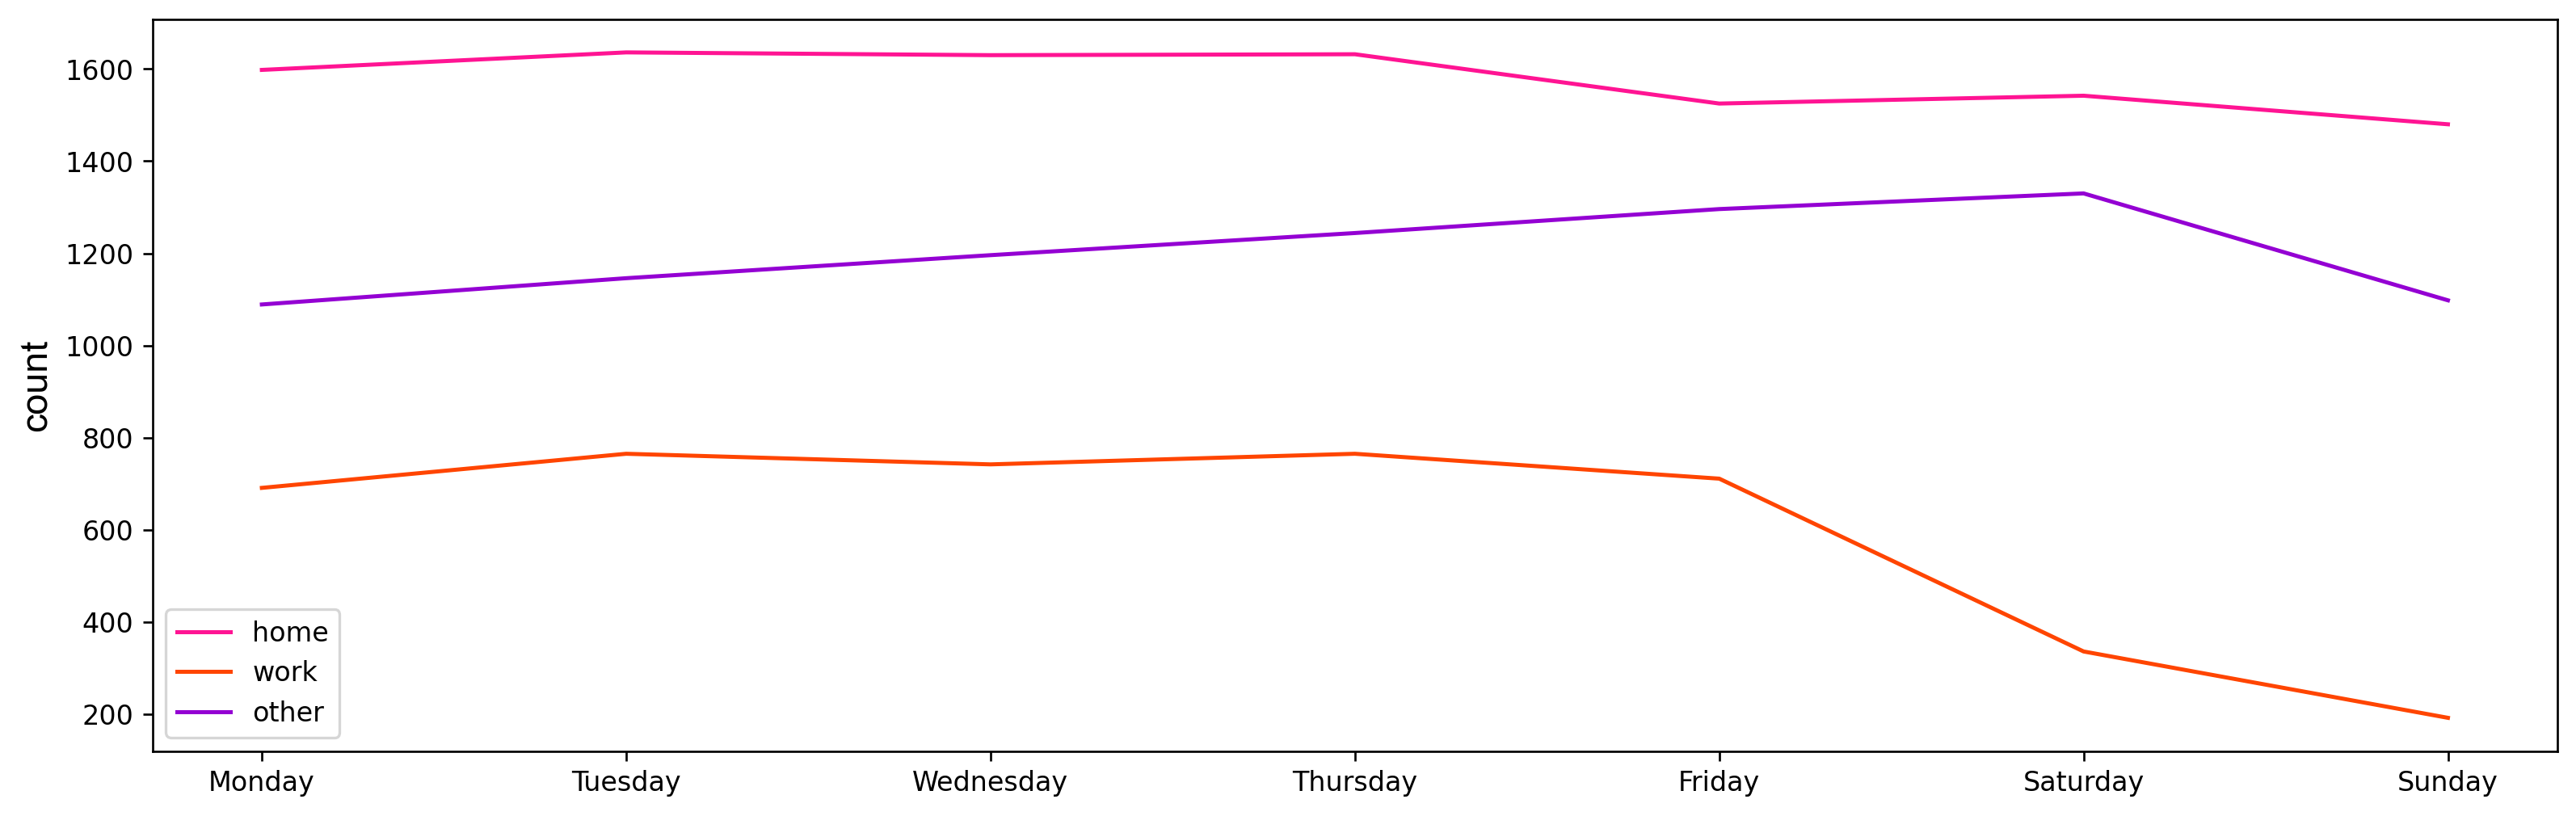

In [27]:
fig = plt.figure (figsize=[16,5],dpi=240)
#fig.patch.set_facecolor('seashell')
plt.plot(np.arange(0,7),act_count_week[7:14]['pid'],label='home',c='deeppink')
plt.plot(np.arange(0,7),act_count_week[14:21]['pid'],label='work',c='orangered')
plt.plot(np.arange(0,7),act_count_week[0:7]['pid'],label='other',c='darkviolet')
#plt.xlabel('weekday',font1)
plt.ylabel('count',font1)
plt.xticks(np.arange(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(loc='best')

In [119]:
pid_attri_uni['age'].value_counts()

7     50
8     41
5     31
6     23
11    19
9     15
10    10
12     8
4      4
15     3
14     3
3      1
Name: age, dtype: int64

## 出行链图示

In [14]:
data = pd.read_csv('data/regression_variable.csv')

In [15]:
data.head()

pid  week  gender  age  employment  time_sum    time_mean  distance_sum  \
0  90221    19       1   11           1   37722.0  1714.636364      162497.0   
1  90221    20       1   11           1   30951.0  1719.500000       60064.0   
2  90221    21       1   11           1   11680.0   687.058824      118519.0   
3  90221    22       1   11           1   22097.0   849.884615      154483.0   
4  90221    24       1   11           1    3455.0   265.769231       28516.0   

   distance_mean  subway_ratio  duration_mean  work_ratio  HWH_count  \
0    7386.227273           0.0     260.571429    0.857143          6   
1    3336.888889           0.0     160.800000    0.800000          4   
2    6971.705882           0.0     190.800000    1.000000          4   
3    5941.653846           0.0     127.000000    0.571429          4   
4    2193.538462           0.0     141.750000    0.000000          0   

   HOH_count  H2H_dif_count  H2H_same_count  Stop_mean  Stop_count  Tour_count  
0          1              0               0   1.000000           7           7  
1          1              0               0   1.000000           5           5  
2          0              0               0   1.000000           4           4  
3          3              2               0   1.222222          11           9  
4          3              0               0   1.000000           3           3

In [16]:
trajectory_labels = np.loadtxt('data/trajectory_labels.txt')
pd.value_counts(trajectory_labels)

2.0    421
1.0    402
3.0    259
5.0    178
4.0     52
0.0      4
dtype: int64

In [17]:
data0 = pd.concat([data.iloc[np.where(trajectory_labels == 0)],data.iloc[np.where(trajectory_labels == 4)]]) #0和4归为一类
data1 = data.iloc[np.where(trajectory_labels==1)]
data2 = data.iloc[np.where(trajectory_labels==2)]
data3 = data.iloc[np.where(trajectory_labels==3)]
data5 = data.iloc[np.where(trajectory_labels==5)]

In [18]:
def calcu_trip_chain(data):
    simple_chain = (sum(data['HWH_count'])+sum(data['HOH_count'])+sum(data['H2H_dif_count'])+sum(data['H2H_same_count']))/sum(data['Tour_count'])
    complex_chain = 1-simple_chain
    return simple_chain,complex_chain

In [19]:
sim0,com0 = calcu_trip_chain(data0)
sim1,com1 = calcu_trip_chain(data1)
sim2,com2 = calcu_trip_chain(data2)
sim3,com3 = calcu_trip_chain(data3)
sim5,com5 = calcu_trip_chain(data5)

In [56]:
com5

0.057636887608069176

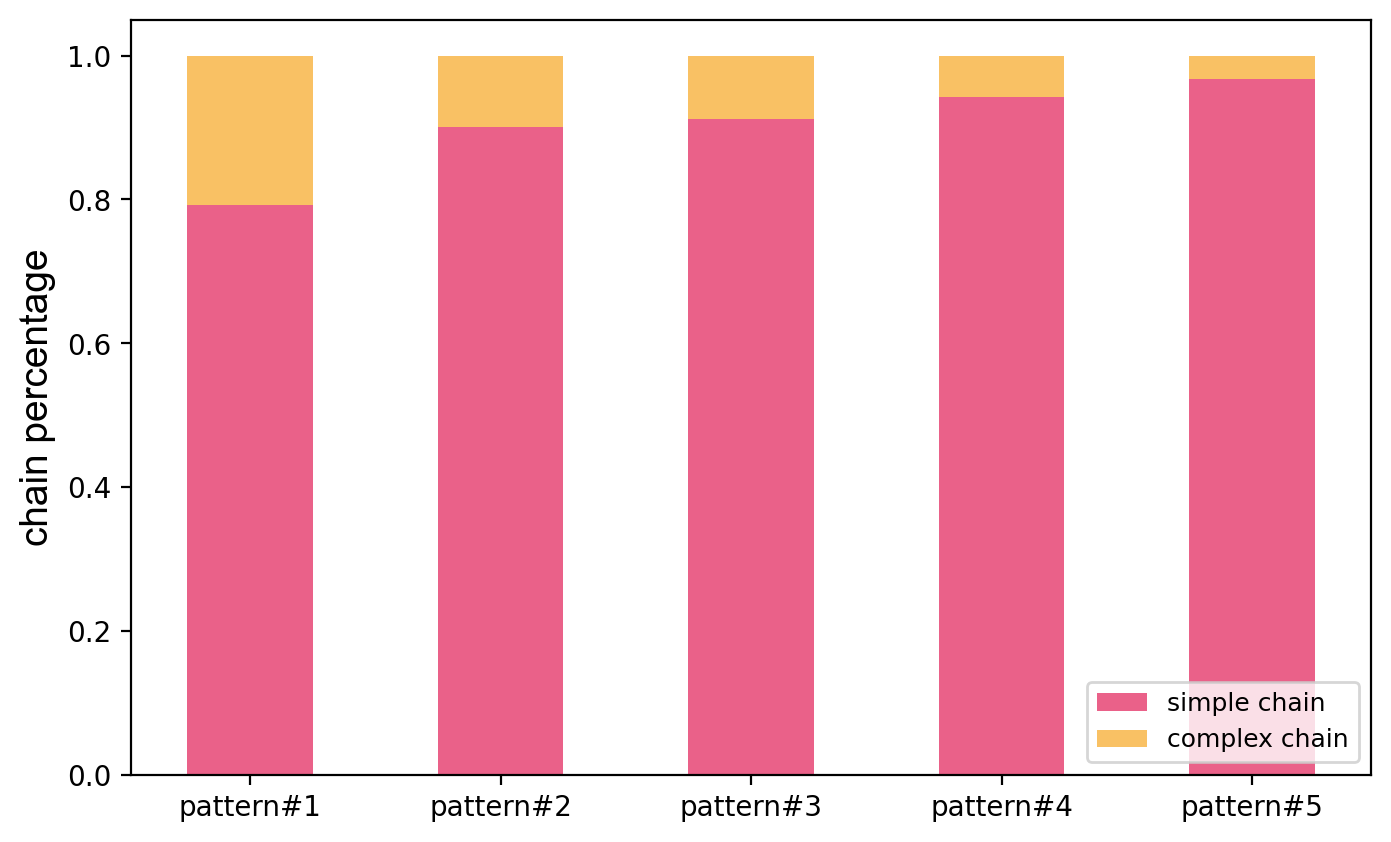

In [45]:
x = np.arange(5)
y1 = np.array([sim1,sim3,sim2,sim5,sim0])
y2 = np.array([com1,com3,com2,com5,com0])
plt.rc(font1)
bar_width = 0.5
plt.figure(dpi=200,figsize=(8,5))
plt.bar(x,y1,tick_label=['pattern#1','pattern#2','pattern#3','pattern#4','pattern#5'],width=bar_width,label='simple chain',color=[234/255,97/255,137/255])
plt.bar(x,y2,bottom=y1,width=bar_width,label='complex chain',color=[249/255,193/255,100/255])
plt.ylabel('chain percentage',font1)
plt.legend(loc='lower right',fontsize=9)
plt.show()

Text(0, 0.5, 'average tour counts')

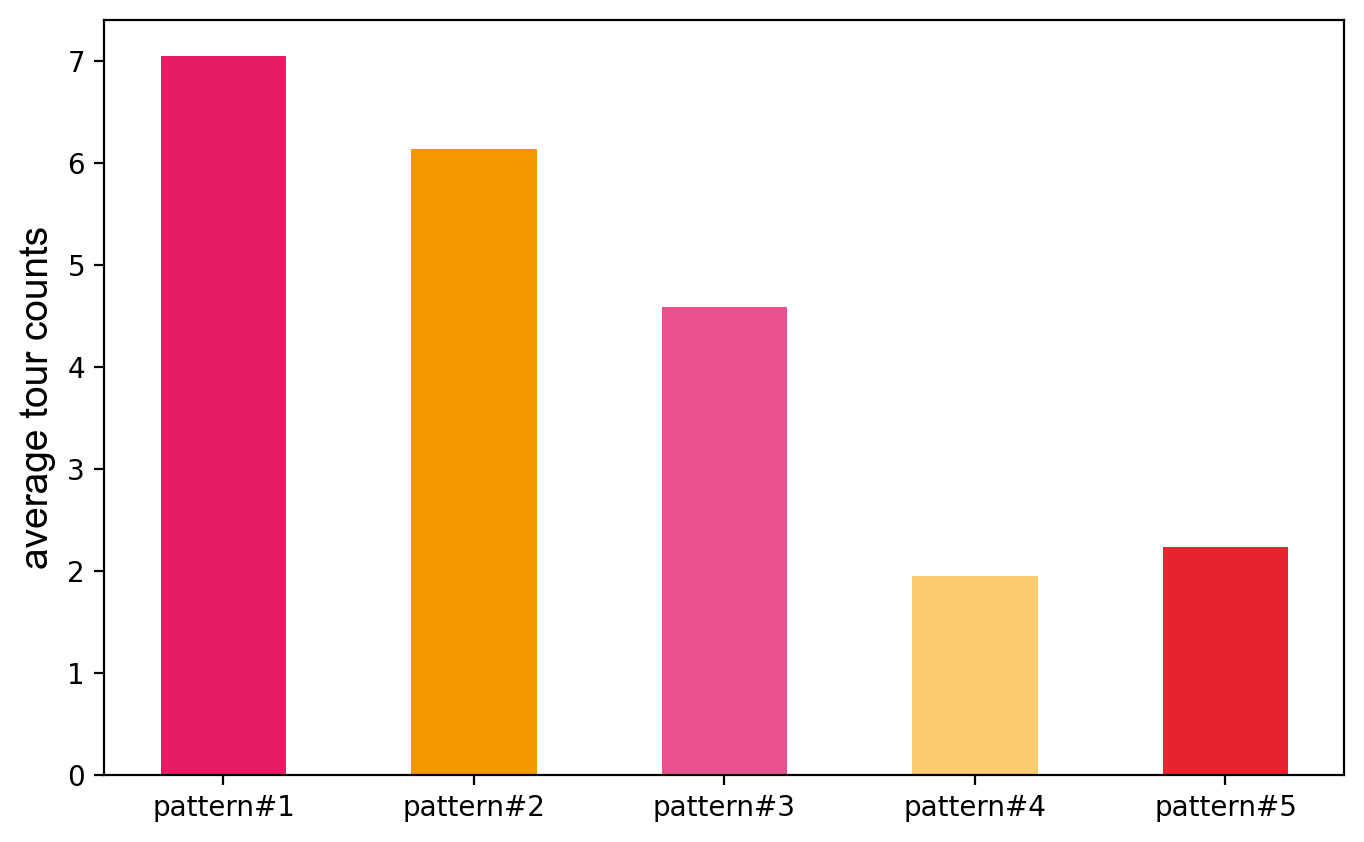

In [57]:
plt.rc(font1)
bar_width = 0.5
plt.figure(dpi=200,figsize=(8,5))
plt.bar('pattern#1',sum(data1['Tour_count'])/len(data1['Tour_count']),width=bar_width,color=[230/255,28/255,100/255])
plt.bar('pattern#2',sum(data3['Tour_count'])/len(data3['Tour_count']),width=bar_width,color=[243/255,151/255,0/255])
plt.bar('pattern#3',sum(data2['Tour_count'])/len(data2['Tour_count']),width=bar_width,color=[233/255,82/255,142/255])
plt.bar('pattern#4',sum(data5['Tour_count'])/len(data5['Tour_count']),width=bar_width,color=[251/255,203/255,114/255])
plt.bar('pattern#5',sum(data0['Tour_count'])/len(data0['Tour_count']),width=bar_width,color=[231/255,36/255,46/255])
 
# plt.title("销量分析")
# plt.xlabel("年份")
plt.ylabel("average tour counts",font1)